In [71]:
import pandas as pd
import numpy as np
from numpy.random import seed, randint
import math

# Plotting
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

# Data synthesis

**Generated fixed true parameter vector**

In [72]:
bee_count = 30
K = bee_count + 1 # can be 0 ... 30 bees sting


def gen_stochastic_vector(K: int) -> list:
    # Generate P
    matrix = np.random.rand(1,K)
    P = matrix/matrix.sum(axis=1)[:,None]
    return P[0] # get only x_1,.., x_k

P_true = gen_stochastic_vector(K)
print("Real parameter, support K={}, \n P={}".format(K, P_true))

Real parameter, support K=31, 
 P=[0.02037247 0.04803141 0.04843897 0.0007056  0.06064448 0.02353875
 0.05494884 0.02054904 0.05089096 0.06022857 0.02579911 0.01756517
 0.05473587 0.01337736 0.03756121 0.01495241 0.00064036 0.05649855
 0.03694689 0.00517804 0.04810142 0.04120351 0.015193   0.03036413
 0.01449928 0.02590456 0.0500722  0.00573988 0.02093728 0.04246412
 0.05391657]


**Sample using P**

Sample experiment result:
 [24 27 17 17 24 16 11 25  6 13 28 16  7  2  6 12 20 25  9 31 16  4 26 17
  5 15 13 10 19 31  8]


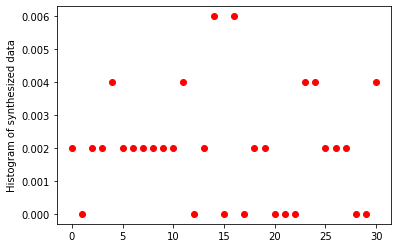

In [84]:
N = 500

def do_experiment(n):
    return np.random.multinomial(n, P, size=1)[0]

def plot_multinomial_data(data):
    data = np.histogram(data, bins=len(data))
    plt.plot(data[0]/N, 'ro')
    plt.ylabel('Histogram of synthesized data')
    plt.show()

data = do_experiment(N)
print("Sample experiment result:\n {}".format(data))
plot_multinomial_data(data)
# Visualize BCI w.r.t P_true

**RMSE distance**

In [74]:
def rmse(p, p_hat):
    s = 0
    for it in zip(p, p_hat):
        diff = it[0] - it[1]
        s += diff * diff
    return math.sqrt(s / len(p))

# Bayesian inference, iteration scheme

In [75]:
def bayes(data, alpha):
    new_alpha = [sum(x) for x in zip(alpha, data)]
    estimated_p = alpha / sum(alpha)
    return (new_alpha, estimated_p)

**Iteration scheme**

In [79]:
n_iter = 100
alpha = np.ones(K)
estimated_p = np.zeros(K)
traces = []
for i in range(0, n_iter):
    # synthesize data
    data = do_experiment(N)
    # inference
    alpha, estimated_p = bayes(data, alpha)
    traces.append((alpha, estimated_p))
print("Last estimated P \n {} \n RMSE to true P = {}".format(estimated_p, rmse(estimated_p, P_true)))


Last estimated P 
 [0.04548666 0.03638126 0.03282793 0.03601785 0.05202802 0.03922796
 0.02392441 0.0404797  0.03482667 0.02081525 0.05241162 0.03099069
 0.01259817 0.00545113 0.01473824 0.02555975 0.04334659 0.04082292
 0.02196604 0.05329995 0.02903232 0.00777291 0.05134158 0.03519008
 0.00605681 0.03593709 0.03298944 0.01221457 0.05172518 0.05523813
 0.01930104] 
 RMSE to true P = 0.024980583522459958


**Show the convergence to true parameter P**

In [82]:
import pymc3 as pm
for tr in traces:
    posterior_sample = np.random.dirichlet(tr[0], 1000)
    # How hpd is calculated for multivariate (dirichlet)
    hpd = pm.stats.hpd(posterior_sample)
    for it in hpd:

        print("HPD={}, width={}".format(
            it,
            abs(it[0] - it[1])
        ))
    
    print("estimated_p={}, distance={}".format(
        tr[0],
        rmse(tr[1], P_true)
    ))
    print("-----------------")

    

HPD=[0.02344682 0.05358829], width=0.03014147453544579
HPD=[0.01806171 0.04675798], width=0.02869627034016954
HPD=[0.02063929 0.05026373], width=0.029624440540836496
HPD=[0.0211748  0.05066137], width=0.02948656597923528
HPD=[0.02526117 0.0562052 ], width=0.03094402431220871
HPD=[0.01419312 0.03928476], width=0.025091645806146853
HPD=[0.00980777 0.03180196], width=0.021994190411916276
HPD=[0.03197542 0.06827804], width=0.0363026286394969
HPD=[0.01824032 0.04500051], width=0.02676019340804056
HPD=[0.01115077 0.03467943], width=0.02352865821358502
HPD=[0.04116784 0.08005466], width=0.038886816940778786
HPD=[0.0077386  0.02902033], width=0.02128173247877477
HPD=[0.00847264 0.02934893], width=0.020876284385101286
HPD=[0.00136357 0.01412919], width=0.012765623825265408
HPD=[0.01030034 0.03217959], width=0.02187925476341556
HPD=[0.02339611 0.05478831], width=0.03139220888955416
HPD=[0.03419852 0.06942145], width=0.035222930733362585
HPD=[0.02016077 0.04745925], width=0.02729847584864501
HPD=

HPD=[0.04196291 0.04863426], width=0.00667134742636577
HPD=[0.03254166 0.03881163], width=0.006269970126045819
HPD=[0.02916636 0.03455446], width=0.005388106169111194
HPD=[0.03013635 0.03593443], width=0.005798081334255908
HPD=[0.05080295 0.05856217], width=0.007759217294830971
HPD=[0.03602324 0.04253548], width=0.00651224548224498
HPD=[0.02148735 0.02648064], width=0.0049932870311821045
HPD=[0.03866069 0.04511058], width=0.006449886615657409
HPD=[0.03276744 0.03852822], width=0.0057607787569867105
HPD=[0.02017608 0.02521799], width=0.005041906717636102
HPD=[0.0488107  0.05606453], width=0.007253833255547577
HPD=[0.02669564 0.03192246], width=0.005226821842153284
HPD=[0.01161993 0.01533507], width=0.00371514067007816
HPD=[0.00423975 0.0066534 ], width=0.0024136502140462033
HPD=[0.01216912 0.01588093], width=0.003711806518110079
HPD=[0.02187368 0.0267177 ], width=0.004844022951245426
HPD=[0.03802564 0.04432746], width=0.006301815327874258
HPD=[0.03580563 0.04221707], width=0.00641144424

HPD=[0.04352179 0.04825713], width=0.004735342536524273
HPD=[0.03417764 0.03834816], width=0.004170519557981048
HPD=[0.03111481 0.03511349], width=0.003998680316803931
HPD=[0.03346111 0.03773306], width=0.00427195053321644
HPD=[0.0507943  0.05575057], width=0.004956262209079701
HPD=[0.03626023 0.04039675], width=0.00413652021144835
HPD=[0.02197654 0.02555902], width=0.003582476817856204
HPD=[0.0383925 0.0429752], width=0.004582690298322013
HPD=[0.03152124 0.035588  ], width=0.004066757730707138
HPD=[0.0200397  0.02339799], width=0.003358285451330361
HPD=[0.04875883 0.05375478], width=0.0049959500792661135
HPD=[0.02875838 0.03272268], width=0.003964292742849748
HPD=[0.01084735 0.01335725], width=0.0025099026610246756
HPD=[0.00492677 0.00661714], width=0.0016903749116593016
HPD=[0.0129004  0.01546945], width=0.0025690536581956733
HPD=[0.02373982 0.02740243], width=0.003662610472246381
HPD=[0.04068568 0.04526934], width=0.0045836589448932374
HPD=[0.03813351 0.04263998], width=0.0045064719

HPD=[0.04406512 0.04815987], width=0.004094755246370173
HPD=[0.03463328 0.0381343 ], width=0.0035010201581012063
HPD=[0.03163492 0.03487232], width=0.0032374029345655572
HPD=[0.03451645 0.03803154], width=0.003515088451451466
HPD=[0.04975037 0.05394353], width=0.004193161143677043
HPD=[0.03610797 0.03973646], width=0.003628483885370855
HPD=[0.0222742  0.02512124], width=0.0028470360217039657
HPD=[0.03889032 0.04268608], width=0.0037957654518898584
HPD=[0.03304344 0.03638659], width=0.0033431484222425645
HPD=[0.01984463 0.02249529], width=0.002650653784405481
HPD=[0.05037218 0.05443411], width=0.004061923823407712
HPD=[0.02977234 0.03304923], width=0.003276887546390217
HPD=[0.01080488 0.0128739 ], width=0.0020690209776377585
HPD=[0.00488059 0.00618924], width=0.00130865563920765
HPD=[0.01399111 0.01634869], width=0.0023575769127376703
HPD=[0.02435065 0.02719712], width=0.0028464735730818758
HPD=[0.04124365 0.04505431], width=0.003810664863456055
HPD=[0.03852485 0.042176  ], width=0.0036

In [70]:
import scipy.stats as stats
stats.bayes_mvs(posterior_sample, 0.95)

(Mean(statistic=0.03225806451612903, minmax=(0.032095014545664165, 0.0324211144865939)),
 Variance(statistic=0.00021453935012571266, minmax=(0.000211161897992838, 0.00021791680225858733)),
 Std_dev(statistic=0.01464716184541267, minmax=(0.014531868105624696, 0.014762455585200642)))